# Circles-Moons

## Generate the dataset

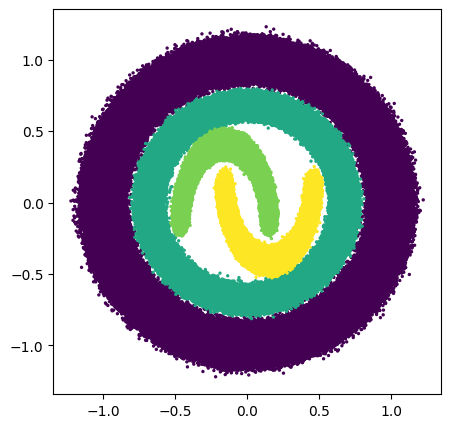

In [1]:
from sklearn.datasets import make_circles, make_blobs, make_moons

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

n_samples = 5000000
X, y = make_circles(n_samples=n_samples, factor=.4, noise=.05)
X2, y2 = make_circles(n_samples=n_samples, factor=.68, noise=.03)
K = _k = _K = len(set(y))
lab = y
l = np.where(y2 == 1)[0]
X, y = np.vstack((X, X2[l])), np.concatenate((y, y2[l] + 2))
N, f = X.shape
res = np.hstack((X, y.reshape((N, 1))))
np.random.shuffle(res)

X, lab = res[:, :-1], res[:, -1].astype(int)

l1 = np.where(lab == 0)[0]
l2 = np.where(lab == 3)[0]
l = np.concatenate((l1, l2))
X1, lab1 = res[l][:, :-1], res[l][:, -1].astype(int)

Xm, lab2 = make_moons(5000000, noise=0.05)
Xm[:, 0] = Xm[:, 0] - 0.5
Xm[:, 1] = Xm[:, 1] - 0.25
Xm = Xm / Xm.max(axis=0)
X2 = Xm * 0.525

X, lab = np.vstack((X1, X2)).astype('float32'), np.concatenate((lab1, lab2 + 4))

N, f = X.shape

plt.figure(figsize=(5, 5))
plt.scatter(X[:,0], X[:,1], c=lab, s=2)
plt.show()


## Save the dataset

In [2]:
df = pd.DataFrame(np.hstack((X, lab.reshape(N, 1))), columns=None)
df.to_csv( 'Circles-Moons.txt', sep='\t', header=None, index=None )
df.shape

(10000000, 3)

# Blobs-Rings

## Generate the dataset

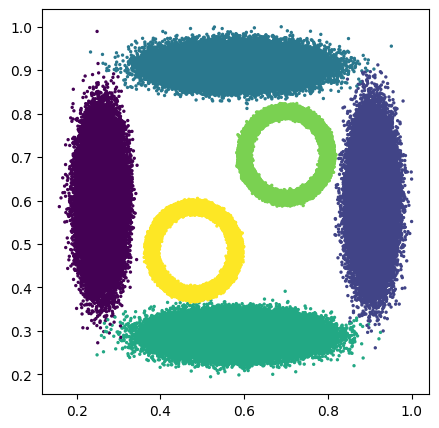

In [3]:
from sklearn.datasets import make_circles, make_blobs, make_moons

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import math

X, y = make_blobs(n_samples=10**6//2,
                  centers=np.array([[10, 95], [160, 95], [(160 - 10) / 2 + 10, 170], [(160 - 10) / 2 + 10, 20]]),
                  cluster_std=np.array([[5, 18], [5, 18], [18, 5], [18, 5]]),
                  n_features=2)

lab = y
X += 50
X = X / X.max(axis=0)

X3, y3 = make_circles(n_samples=10**6 // 2, factor=.4, noise=.05)
_1s = np.where(y3 == 0)
X3, y3 = X3[_1s], y3[_1s]
X3 = X3 * 0.1
X3[:, 0] += 0.7
X3[:, 1] += 0.705
X, lab = np.vstack((X, X3)), np.concatenate((y, y3 + 4))

X3, y3 = make_circles(n_samples=10**6 // 2, factor=.4, noise=.05)
_1s = np.where(y3 == 0)
X3, y3 = X3[_1s], y3[_1s]
X3 = X3 * 0.1
X3[:, 0] += 0.48
X3[:, 1] += 0.485
X, lab = np.vstack((X, X3)), np.concatenate((lab, y3 + 5))


N, f = X.shape
plt.figure(figsize=(5, 5))
plt.scatter(X[:, 0], X[:, 1], s=2, c=lab)
plt.show()

## Save the dataset

In [4]:
df = pd.DataFrame(np.hstack((X, lab.reshape(N, 1))), columns=None)
df.to_csv( 'Blobs-Rings.txt', sep='\t', header=None, index=None )
df.shape

(1000000, 3)